<a href="https://colab.research.google.com/github/marcinwolter/MachineLearnin2019_projects/blob/master/SvitlanaPastukh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

clas_pred  clas_test  clas_train
/content/drive/My Drive/image_classification/clas_train/clas_train
forest
buildings
mountain
glacier
street
sea
Shape of Images: (600, 128, 128, 3)
Shape of Labels: (600,)


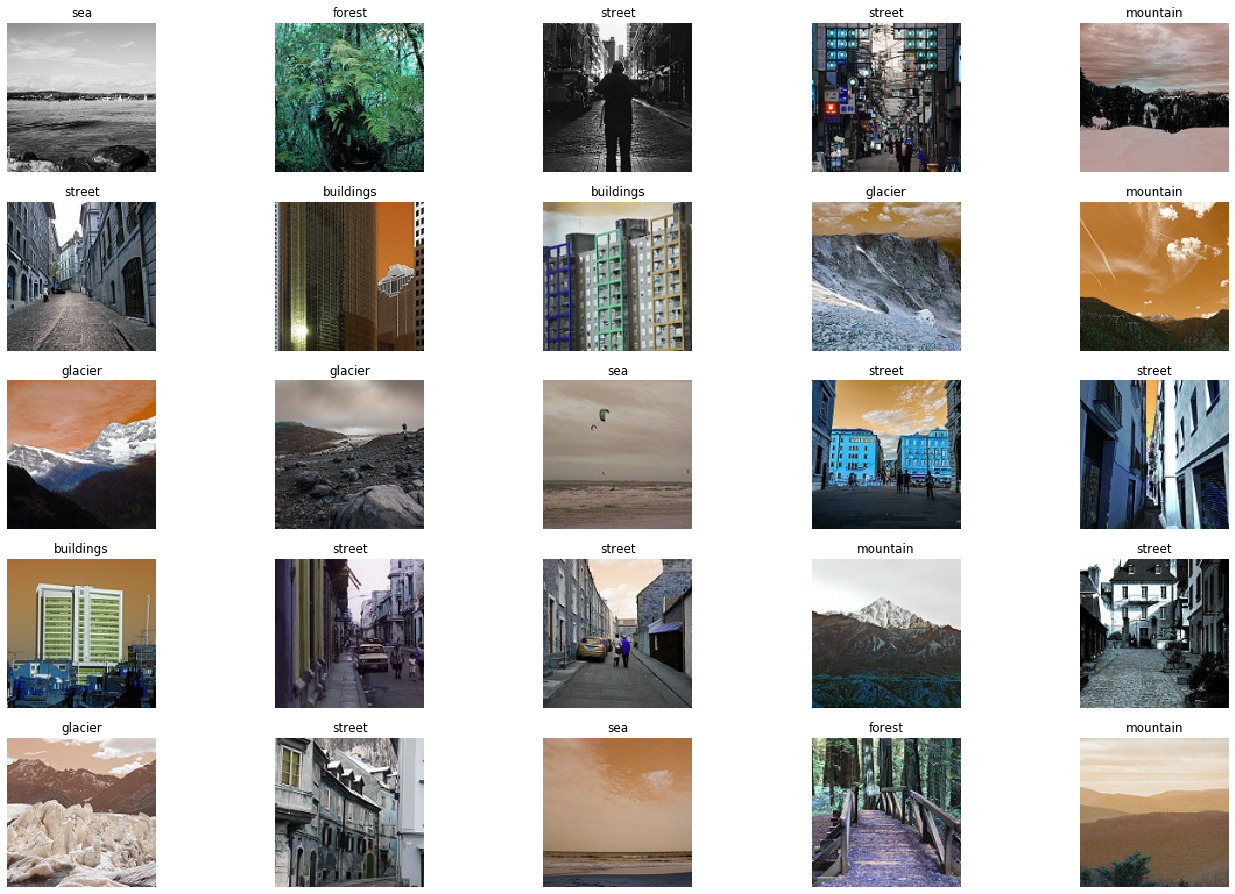

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from sklearn.utils import shuffle
from random import randint
from IPython.display import SVG
import matplotlib.gridspec as gridspec
import tensorflow.keras.utils as Utils
from keras.utils.vis_utils import model_to_dot
import numpy as np
import os
import matplotlib.pyplot as plot
from sklearn.metrics import confusion_matrix as CM

!ls drive/My\ Drive/image_classification
!cd drive/My\ Drive/image_classification/clas_train/clas_train; pwd

#train the model

def get_classlabel(class_code):
               labels = {2:'glacier', 4:'sea', 0:'buildings', 1:'forest', 5:'street', 3:'mountain'}
               return labels[class_code]


def get_images(directory):
    Images = []
    Labels = []   # 0 for Building , 1 for forest, 2 for glacier, 3 for mountain, 4 for Sea , 5 for Street
    label = 0
    
    for labels in os.listdir(directory): #Main Directory where each class label is present as folder name.
        print(labels)
        if labels == 'glacier': 
            label = 2
        elif labels == 'sea':
            label = 4
        elif labels == 'buildings':
            label = 0
        elif labels == 'forest':
            label = 1
        elif labels == 'street':
            label = 5
        elif labels == 'mountain':
            label = 3
        i=0
        for image_file in os.listdir(directory+labels): #Extracting the file name of the image from Class Label folder
            image = cv2.imread(directory+labels+r'/'+image_file) #Reading the image (OpenCV)
            image = cv2.resize(image,(128,128)) #Resize the image, Some images are different sizes. (Resizing is very Important)
            Images.append(image)
            Labels.append(label)
            i=i+1
           
            if i==100:
              break
    
    return shuffle(Images,Labels,random_state=817328462) #Shuffle the dataset we just prepare


Images, Labels = get_images('drive/My Drive/image_classification/clas_train/clas_train/')
Images = np.array(Images) 
Labels = np.array(Labels)


print("Shape of Images:",Images.shape)
print("Shape of Labels:",Labels.shape)

f,ax = plot.subplots(5,5) 
f.subplots_adjust(0,0,3,3)
for i in range(0,5,1):
    for j in range(0,5,1):
        rnd_number = randint(0,len(Images)-1)
        #print(i,j)
        ax[i,j].imshow(Images[rnd_number])
        ax[i,j].set_title(get_classlabel(Labels[rnd_number]))
        ax[i,j].axis('off')

In [0]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('drive/My Drive/image_classification/clas_train/clas_train/',
                                                 target_size = (128, 128),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 14034 images belonging to 6 classes.


In [0]:
test_set = test_datagen.flow_from_directory('drive/My Drive/image_classification/clas_test/', 
                                            target_size = (128, 128),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 3000 images belonging to 6 classes.


In [0]:
# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(128, (3, 3), input_shape = (128, 128, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(128, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(128, activation = 'relu'))
classifier.add(Dense(6, activation = 'softmax'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [0]:
classifier.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 126, 126, 128)     3584      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 63, 63, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 61, 61, 128)       147584    
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 30, 30, 128)       0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 115200)            0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               14745728  
_________________________________________________________________
dense_11 (Dense)             (None, 6)                

In [0]:
trained = classifier.fit(training_set,
                         steps_per_epoch = 560//32,
                         epochs = 50,  #15
                         validation_data = test_set,
                         validation_steps = 150//32)

Epoch 1/50
17/17 [==============================] - 144s 8s/step - loss: 2.2409 - acc: 0.2794 - val_loss: 1.7626 - val_acc: 0.2422
Epoch 2/50
17/17 [==============================] - 74s 4s/step - loss: 1.3783 - acc: 0.4504 - val_loss: 1.2614 - val_acc: 0.5234
Epoch 3/50
17/17 [==============================] - 101s 6s/step - loss: 1.2548 - acc: 0.5110 - val_loss: 1.1276 - val_acc: 0.5703
Epoch 4/50
17/17 [==============================] - 100s 6s/step - loss: 1.2217 - acc: 0.5221 - val_loss: 1.0729 - val_acc: 0.6016
Epoch 5/50
17/17 [==============================] - 110s 6s/step - loss: 1.1941 - acc: 0.5165 - val_loss: 1.1292 - val_acc: 0.5703
Epoch 6/50
17/17 [==============================] - 106s 6s/step - loss: 1.0731 - acc: 0.5699 - val_loss: 1.6572 - val_acc: 0.4688
Epoch 7/50
17/17 [==============================] - 106s 6s/step - loss: 1.0200 - acc: 0.6250 - val_loss: 1.1810 - val_acc: 0.5312
Epoch 8/50
17/17 [==============================] - 106s 6s/step - loss: 1.0990 - ac

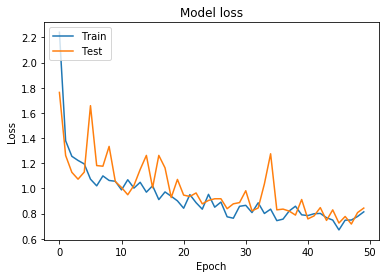

In [0]:
plot.plot(trained.history['loss'])
plot.plot(trained.history['val_loss'])
plot.title('Model loss')
plot.ylabel('Loss')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

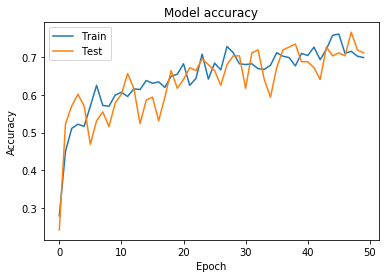

In [0]:
plot.plot(trained.history['acc'])
plot.plot(trained.history['val_acc'])
plot.title('Model accuracy')
plot.ylabel('Accuracy')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

In [0]:
pred_images, true_labels = get_images('drive/My Drive/image_classification/clas_test/')
pred_images = np.array(pred_images)
pred_images.shape


mountain
buildings
forest
sea
street
glacier


(600, 128, 128, 3)

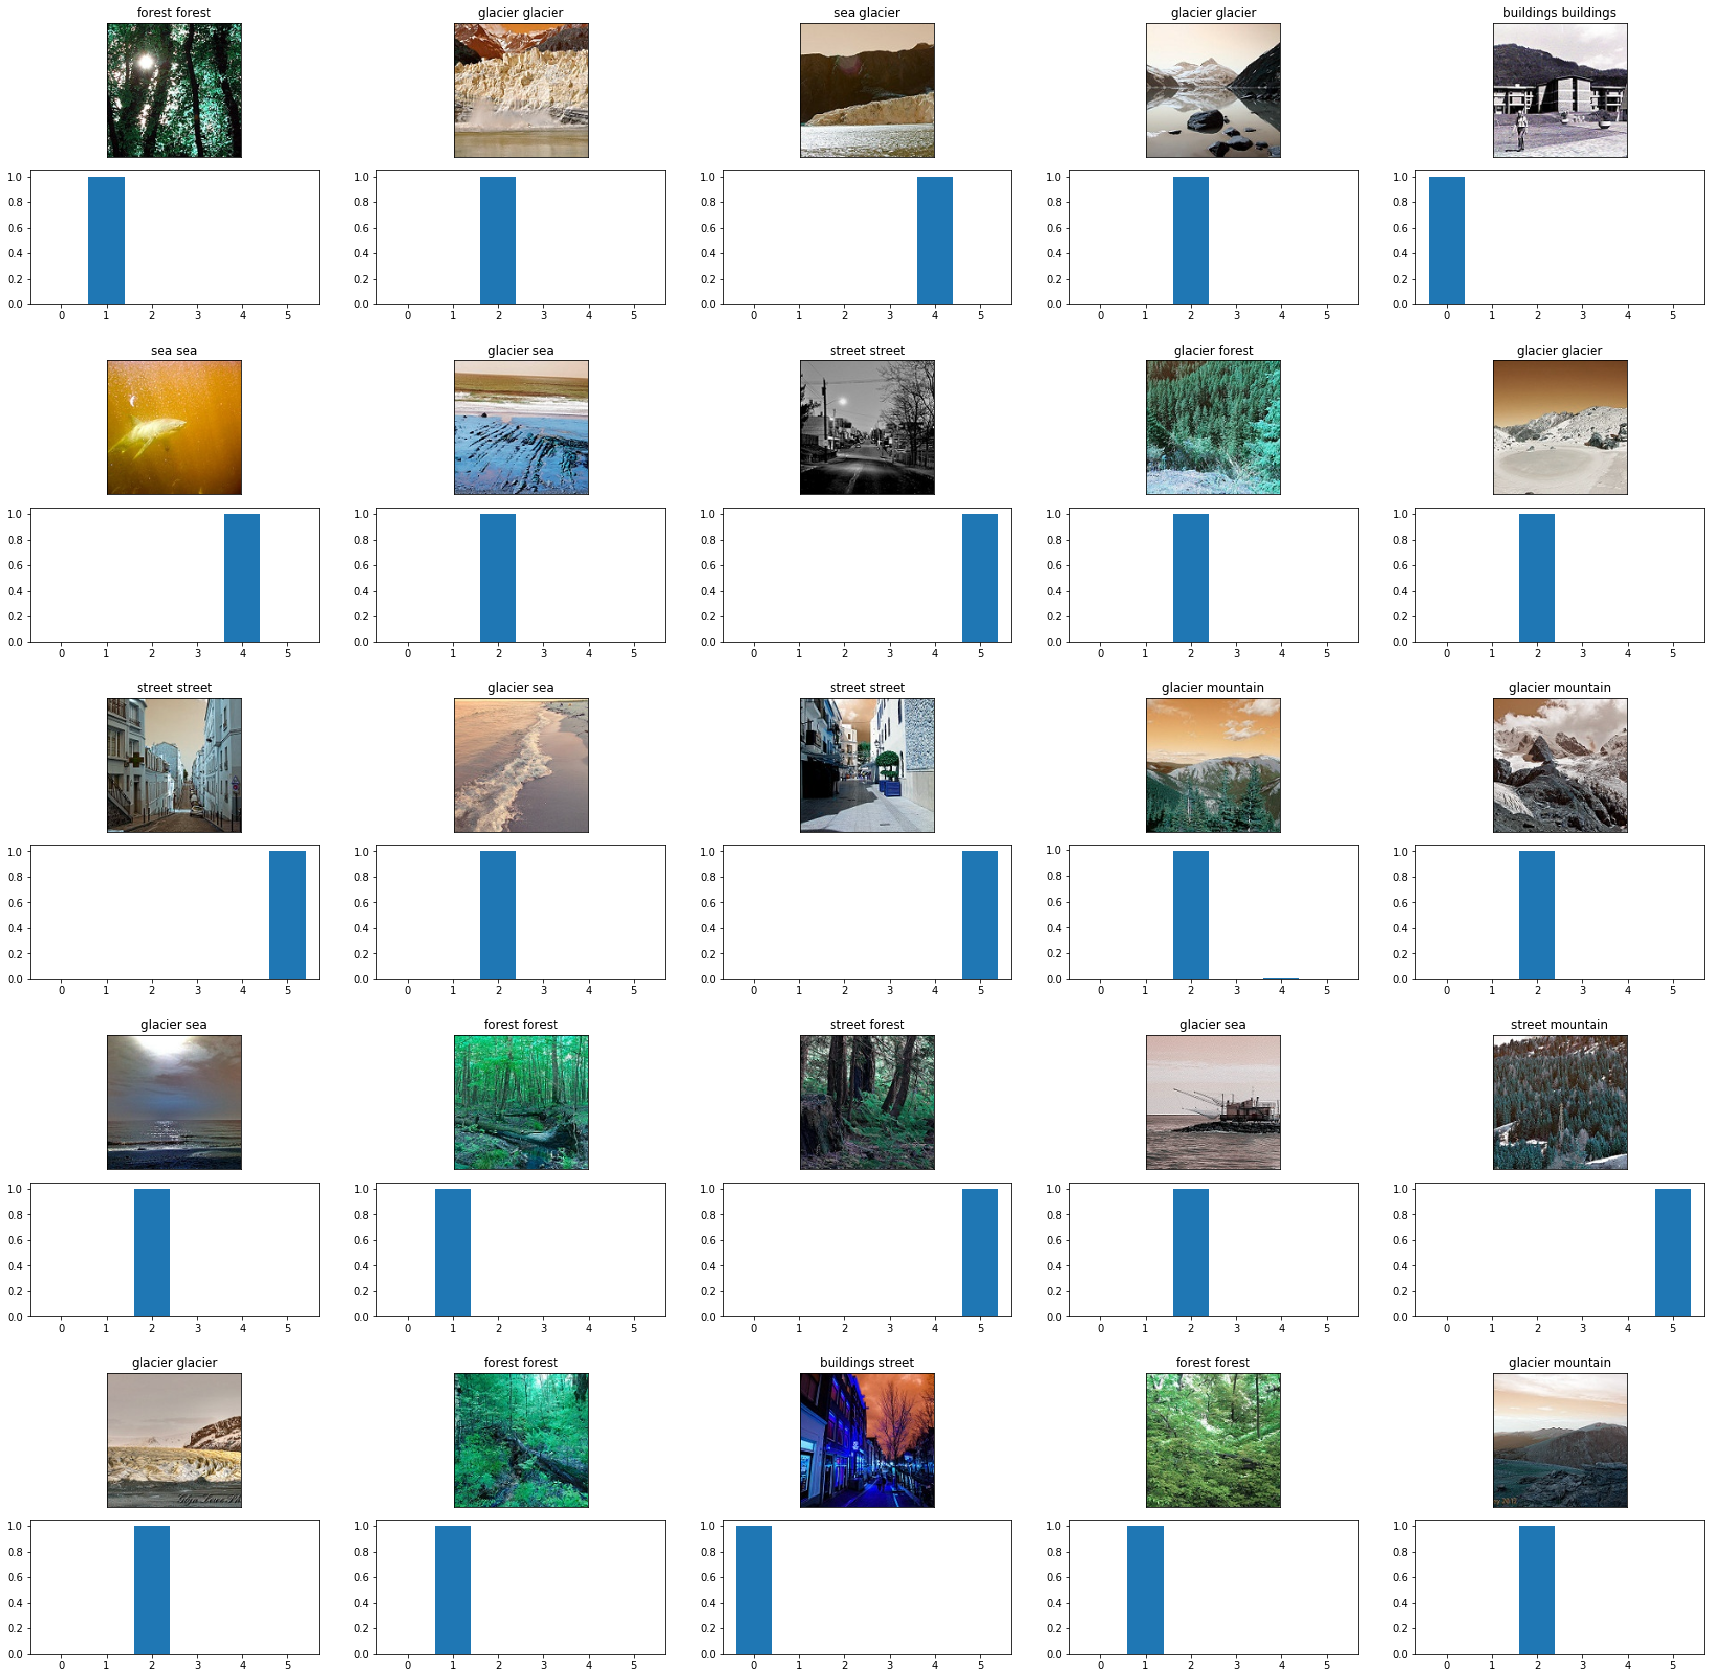

In [0]:
fig = plot.figure(figsize=(30, 30))
outer = gridspec.GridSpec(5, 5, wspace=0.2, hspace=0.2)

for i in range(25):
    inner = gridspec.GridSpecFromSubplotSpec(2, 1,subplot_spec=outer[i], wspace=0.1, hspace=0.1)
    rnd_number = randint(0,len(pred_images))
    pred_image = np.array([pred_images[rnd_number]])
    pred_class = get_classlabel(classifier.predict_classes(pred_image)[0])
    pred_prob = classifier.predict(pred_image).reshape(6)
    for j in range(2):
        if (j%2) == 0:
            ax = plot.Subplot(fig, inner[j])
            ax.imshow(pred_image[0])
            ax.set_title(pred_class+" "+get_classlabel(true_labels[rnd_number]))
            ax.set_xticks([])
            ax.set_yticks([])
            fig.add_subplot(ax)
        else:
            ax = plot.Subplot(fig, inner[j])
            ax.bar([0,1,2,3,4,5],pred_prob)
            fig.add_subplot(ax)


fig.show()

In [0]:
# Confusion matrix result

y_test = np.array(true_labels)


from sklearn.metrics import classification_report, confusion_matrix
y_pred = classifier.predict_classes(pred_images, verbose=2)


#confusion matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

600/600 - 1s
[[68  0 16  0  2 14]
 [ 7 51 18  0  0 24]
 [ 8  0 79  0 12  1]
 [ 9  0 57  7 25  2]
 [ 7  1 63  1 27  1]
 [12  0 21  0  0 67]]
